# Ejemplillo de predicción de performance de un modelo de deep learning reinforcement (lczero.org)


In [70]:
import pandas as pd 
import fbprophet

# Data from https://docs.google.com/spreadsheets/d/18UWR4FVhPi0vNwwPreu_avd9ycujGQ5ayR2LzJOWP4s/edit#gid=823198584

df = pd.read_csv("datasets/lzcero.csv")
df = df.tail(21)
df
df.ID.

,ID,y,ds
33,LCZero_Id125_738e,2444,2018-04-13
34,LCZero_Id129_c76f,2399,2018-04-14
35,LCZero_Id133_6691,2313,2018-04-15
36,LCZero_Id138_5367,2319,2018-04-16
37,LCZero_Id141_5874,2357,2018-04-17
38,LCZero_Id145_e094,2427,2018-04-18
39,LCZero_Id149_5520,2459,2018-04-19
40,LCZero_Id156_acf9,2603,2018-04-20
41,LCZero_Id163_890d,2597,2018-04-21
42,LCZero_Id170_cd9d,2628,2018-04-22


In [71]:
# Generamos un modelo, y lo entrenamos
df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
df_prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.
/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [72]:
df_forecast = df_prophet.make_future_dataframe(periods=180, freq='D')
df_forecast = df_prophet.predict(df_forecast)

df_forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2018-04-13,2401.452636,2401.452636,2401.452636,2432.176005,2472.639233,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,2451.041627
1,2018-04-14,2365.845578,2365.845578,2365.845578,2353.141230,2393.606512,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,2374.408843
2,2018-04-15,2330.238522,2330.238522,2330.238522,2311.584986,2351.527586,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,2331.901634
3,2018-04-16,2324.617084,2324.617084,2324.617084,2313.977194,2353.737389,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,2333.649720
4,2018-04-17,2379.368240,2379.368240,2379.368240,2310.882273,2353.347360,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,2332.311854
5,2018-04-18,2434.119389,2434.119389,2434.119389,2419.829814,2459.989096,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,2440.308481
6,2018-04-19,2488.870539,2488.870539,2488.870539,2439.992978,2480.551429,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,2460.889828
7,2018-04-20,2543.621681,2543.621681,2543.621681,2572.842305,2613.215595,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,2593.210672
8,2018-04-21,2584.340222,2584.340222,2584.340222,2572.518253,2612.978297,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,2592.903487
9,2018-04-22,2625.058764,2625.058764,2625.058764,2606.759881,2645.435980,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,2626.721876


In [75]:

df_forecast[(df_forecast.ds < "2018-08-01") & (df_forecast.ds > "2018-05-01")] 
    



,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
19,2018-05-02,2836.076911,2836.076911,2836.076911,2822.546208,2862.180836,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,2842.266003
20,2018-05-03,2846.870962,2846.870962,2846.870962,2799.261518,2840.906165,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,2818.890251
21,2018-05-04,2857.665014,2852.332583,2862.639681,2886.417061,2927.932685,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,2907.254005
22,2018-05-05,2868.459065,2849.056718,2884.789812,2848.123824,2903.070802,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,8.563265,2877.022330
23,2018-05-06,2879.253116,2839.603515,2912.731716,2836.342902,2919.774946,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,1.663112,2880.916229
24,2018-05-07,2890.047167,2829.730982,2945.164291,2835.524515,2960.077245,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,9.032636,2899.079803
25,2018-05-08,2900.841219,2816.407405,2980.612116,2763.146414,2937.968561,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,-47.056385,2853.784833
26,2018-05-09,2911.635270,2794.888448,3016.575603,2795.853207,3027.434494,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,6.189092,2917.824362
27,2018-05-10,2922.429321,2764.732522,3060.094111,2737.511429,3023.565622,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,-27.980711,2894.448610
28,2018-05-11,2933.223373,2734.030228,3096.674880,2786.837267,3150.549063,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,49.588991,2982.812364


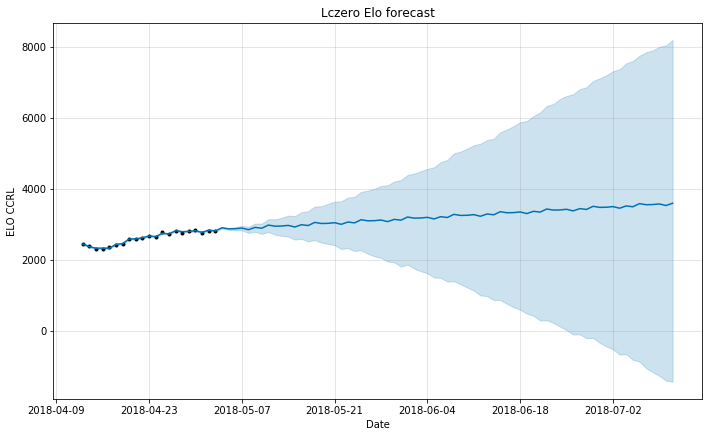

In [74]:
import matplotlib.pyplot as plt

df_prophet.plot(df_forecast.head(90), xlabel = 'Date', ylabel = 'ELO CCRL')
plt.title('Lczero Elo forecast')
